In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load dataset with optimized dtypes
merged_df = pd.read_csv('CitiBike_with_weather.csv')

C:\Users\anika\AppData\Local\Temp\ipykernel_14024\1384878670.py:2: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df = pd.read_csv('CitiBike_with_weather.csv')


In [6]:
#Set theme
sns.set_theme(style="whitegrid", palette="Blues_r")

In [8]:
# Aggregate start station frequencies
merged_df['value'] = 1
station_counts = merged_df.groupby('start_station_name')['value'].count().reset_index()
top20 = station_counts.nlargest(20, 'value')

C:\Users\anika\AppData\Local\Temp\ipykernel_14024\704237387.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top20, x='value', y='start_station_name', palette='Blues_r')


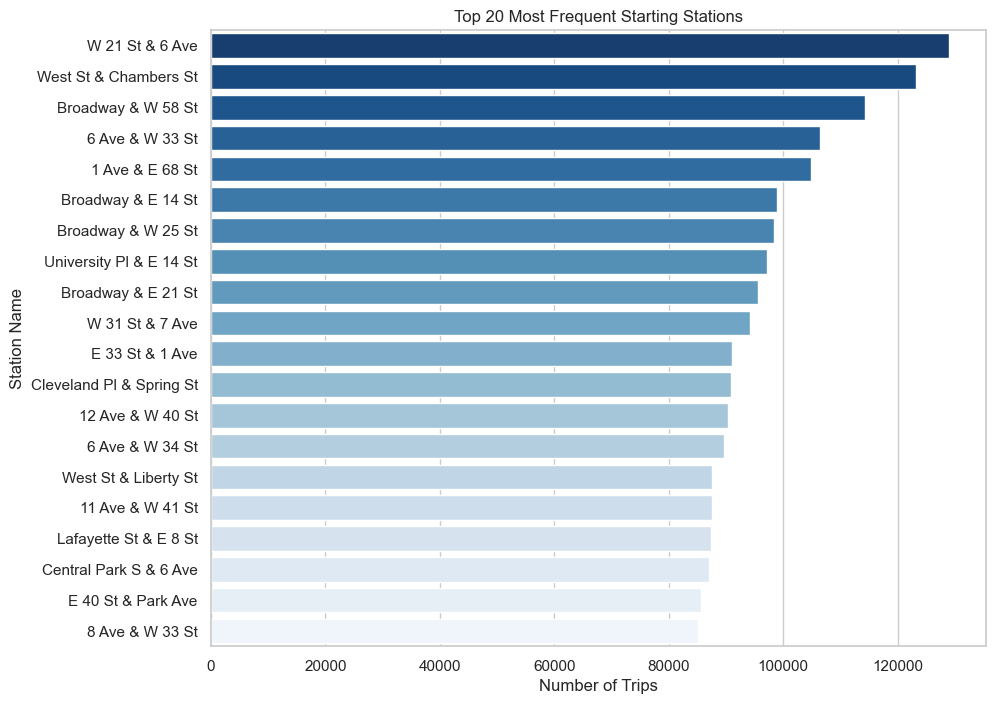

In [9]:
# Create bar chart with temporary palette adjustment
plt.figure(figsize=(10, 8))
sns.barplot(data=top20, x='value', y='start_station_name', palette='Blues_r')
plt.title('Top 20 Most Frequent Starting Stations')
plt.xlabel('Number of Trips')
plt.ylabel('Station Name')
plt.show()

In [12]:
#The Blues_r palette works well here, as it provides a gradient that emphasizes higher frequencies with darker shades, making the plot intuitive

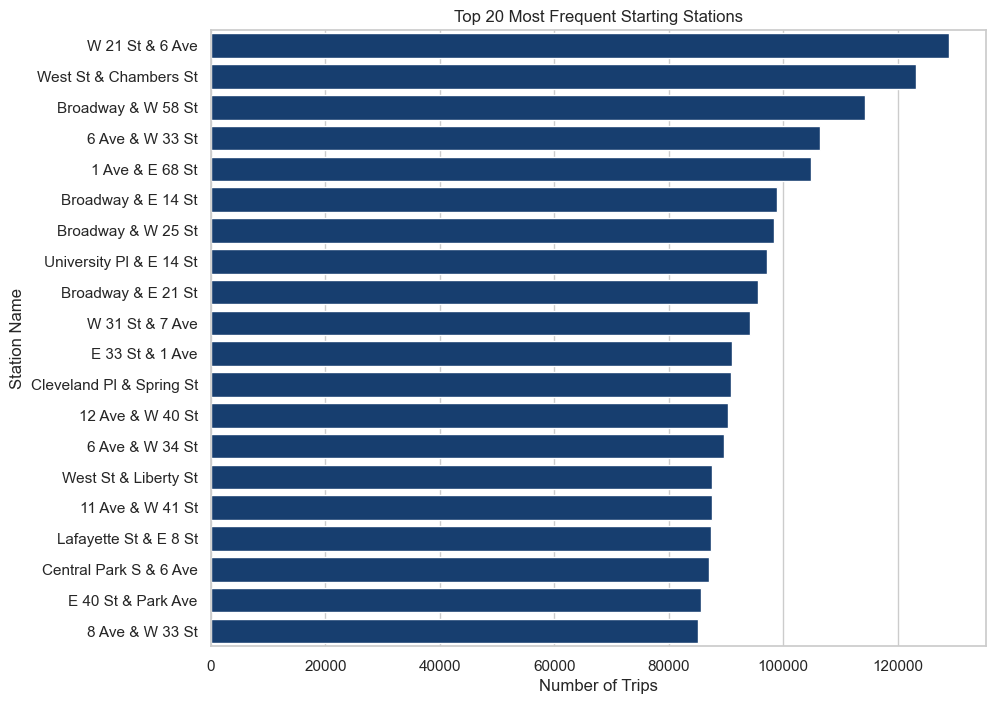

In [10]:
with sns.color_palette('Blues_r', n_colors=20):
    plt.figure(figsize=(10, 8))
    sns.barplot(data=top20, x='value', y='start_station_name')
    plt.title('Top 20 Most Frequent Starting Stations')
    plt.xlabel('Number of Trips')
    plt.ylabel('Station Name')
    plt.show()

In [16]:
#Bar chart reveals high-demand areas such as central business districts or transit hubs.

In [19]:
# Aggregate daily bike rides
daily_trips = merged_df.groupby('date').size().reset_index(name='bike_rides_daily')
daily_trips = daily_trips.merge(merged_df.groupby('date')['avgWeather'].mean().reset_index(), on='date', how='left')

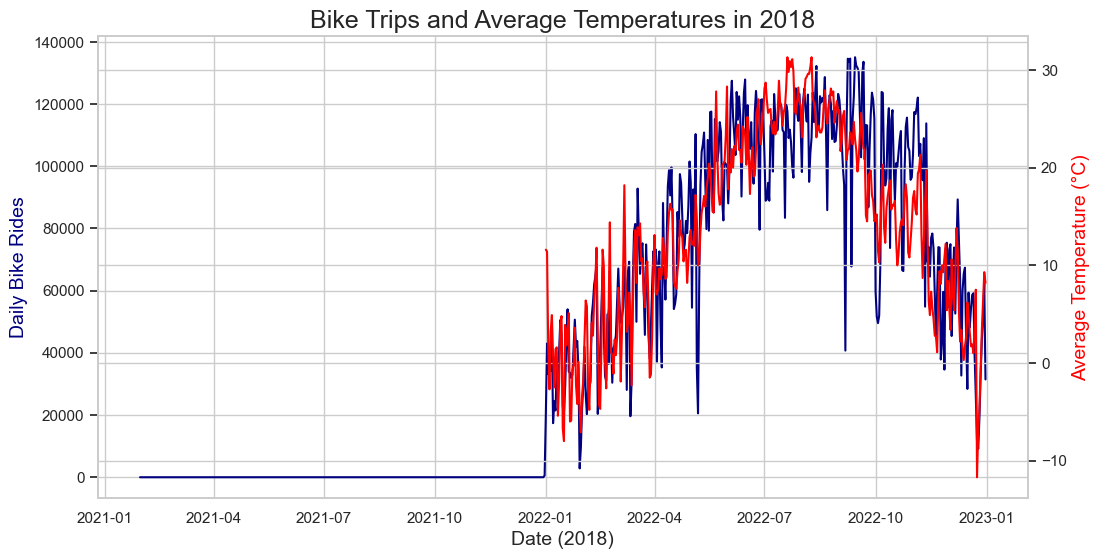

In [20]:
#Dual-Axis Line Chart
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=daily_trips, x='date', y='bike_rides_daily', color='navy', ax=ax)
ax.set_xlabel('Date (2018)', fontsize=14)
ax.set_ylabel('Daily Bike Rides', color='navy', fontsize=14)
ax2 = ax.twinx()
sns.lineplot(data=daily_trips, x='date', y='avgWeather', color='red', ax=ax2)
ax2.set_ylabel('Average Temperature (°C)', color='red', fontsize=14)
plt.title('Bike Trips and Average Temperatures in 2018', fontsize=18)
plt.show()

In [30]:
print(merged_df['tripduration_min'].describe())

count    2.983881e+07
mean     3.102609e-01
std      8.503809e+00
min     -9.548153e-01
25%      9.661361e-02
50%      1.693700e-01
75%      2.999944e-01
max      1.303097e+04
Name: tripduration_min, dtype: float64


In [35]:
# Use .loc to avoid SettingWithCopyWarning
merged_df.loc[:, "tripduration_min"] = merged_df["tripduration"] / 60  

C:\Users\anika\AppData\Local\Temp\ipykernel_14024\3411744564.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df.loc[:, "tripduration_min"] = merged_df["tripduration"] / 60


In [36]:
merged_df = merged_df[(merged_df['tripduration_min'] >= 0) & (merged_df['tripduration_min'] <= 60)]

In [37]:
print(merged_df['tripduration_min'].describe())

count    2.983727e+07
mean     2.906176e-01
std      1.060157e+00
min      2.480556e-03
25%      9.661333e-02
50%      1.693650e-01
75%      2.999731e-01
max      5.994736e+01
Name: tripduration_min, dtype: float64


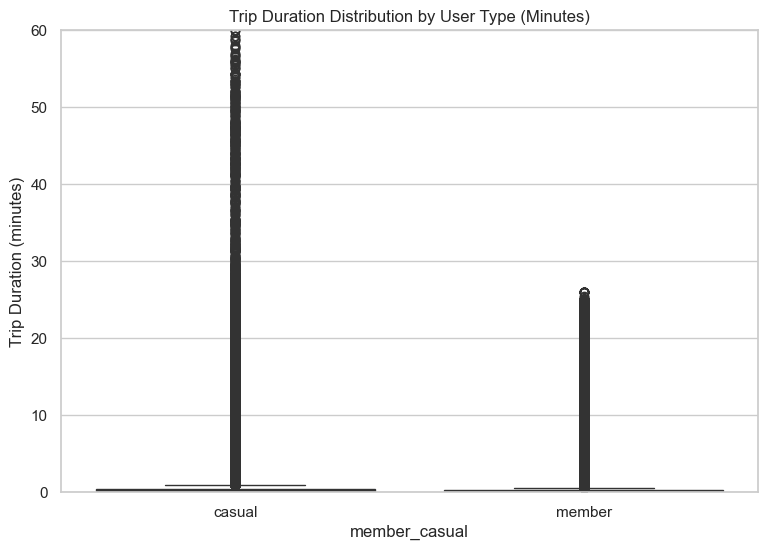

In [38]:
#Box Plot
plt.figure(figsize=(9,6))
sns.boxplot(
    x="member_casual",
    y="tripduration_min",
    data=merged_df)
plt.ylim(0, 60)  
plt.title("Trip Duration Distribution by User Type (Minutes)")
plt.ylabel("Trip Duration (minutes)")
plt.show()

In [39]:
# Diagnostic checks
print("Trip Duration Stats:")
print(merged_df['tripduration_min'].describe())
print("\nUnique Values in member_casual:")
print(merged_df['member_casual'].unique())

Trip Duration Stats:
count    2.983727e+07
mean     2.906176e-01
std      1.060157e+00
min      2.480556e-03
25%      9.661333e-02
50%      1.693650e-01
75%      2.999731e-01
max      5.994736e+01
Name: tripduration_min, dtype: float64

Unique Values in member_casual:
['casual' 'member']


In [40]:
#The box plot isnt very clear
#mean (0.2906 minutes) and median (0.1694 minutes) are very small, suggesting most trip durations are under 0.3 minutes on average.
#standard deviation (1.060157) and maximum (59.94736 minutes) indicate some variability, but the bulk of the data is clustered at very low values
#25th percentile (0.0966 minutes) and 75th percentile (0.2999 minutes) are extremely close, meaning the interquartile range (IQR) is tiny (about 0.2 minutes). This could cause the box in the box plot to be nearly invisible.

In [47]:
plt.savefig("box_plot_trip_duration.png", dpi=300, bbox_inches="tight")

<Figure size 640x480 with 0 Axes>

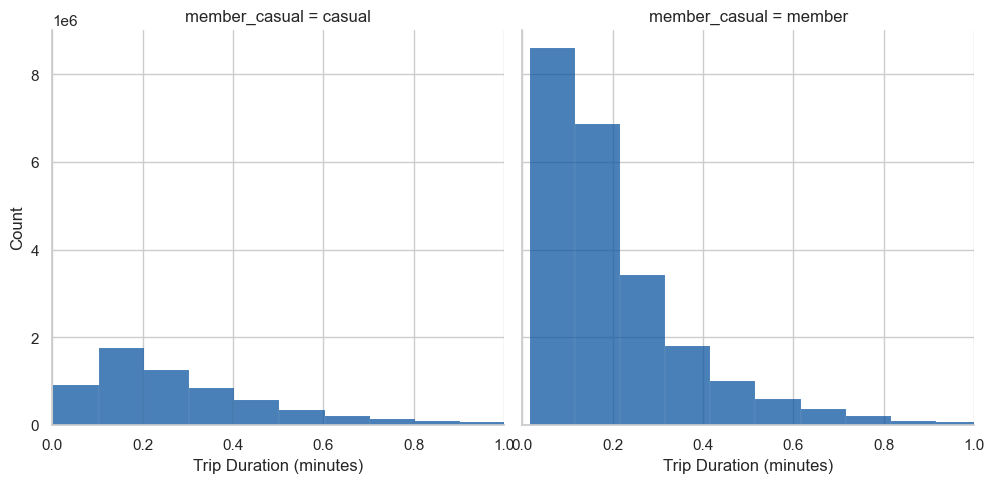

In [44]:
#FacetGrid – Trip Duration Distribution by User Type
merged_df.loc[:, "tripduration_min"] = merged_df["tripduration"] / 60
merged_df = merged_df[(merged_df['tripduration_min'] >= 0) & (merged_df['tripduration_min'] <= 60)]  # Filter if not done

g = sns.FacetGrid(merged_df, col="member_casual", height=5, aspect=1)
g.map(sns.histplot, "tripduration_min", binwidth=0.1)  # Finer binning
g.set_axis_labels("Trip Duration (minutes)", "Count")
g.set(xlim=(0, 1))  # Focus on IQR range
plt.show()

In [45]:
#Both histograms are dominated by a single tall bin near 0 minutes, indicating that most trip durations are very short
#Distribution drops off quickly after 0.2-0.4 minutes, with little activity beyond 1 minute, aligning with the narrow IQR

In [46]:
g.savefig("trip_duration_distribution.png", dpi=300, bbox_inches="tight")